# Machine Learning
## Module 4 - Unsupervised Machine Learning
### Assignment 4

Owner: João Martins | Project Manager <br>
Date: 31st May

## 1. Main objective of this assignment

The main objective for this assigment is to find the best Deep Learning model that best fit for the dataset. This will be usefull for companies that want to build a model to predict the results based on the inputs tehy collect along with the business operations. 
<br>

## 2. The dataset

The dataset used in this assigment is a bank personal loan file, downloaded from the website data repository **kaggle**. From this dataset we expect to find the best Deep Learning model to explore ways of converting the Thera Bank liability customers to personal loan customers (while retaining them as depositors).

#### 2.1 Data Description
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### 2.2 Context
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
<br>

## 3. Brief Summary

The ML unspuervised models that we will used in this assignment are **K-Mean clustering model, Aglomerative clustering model, Pipeline of models and PCA model**
<br>

## 4. Data Analysis

In [28]:
# Setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

#Setup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
loan_df = pd.read_csv('bank_loan.csv')
loan_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
loan_df.set_index('ID')

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                            
1      25           1      49     91107       4    1.6          1         0   
2      45          19      34     90089       3    1.5          1         0   
3      39          15      11     94720       1    1.0          1         0   
4      35           9     100     94112       1    2.7          2         0   
5      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   29           3      40     92697       1    1.9          3         0   
4997   30           4      15     92037       4    0.4          1        85   
4998   63          39      24     93023       2    0.3          3         0   
4999   65          40      49     90034       3    0.5          2         0   
5000   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
ID                                                                       
1                 0                   1           0       0           0  
2                 0                   1           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           0  
5                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       1           0  
4998              0                   0           0       0           0  
4999              0                   0           0       1           0  
5000              0                   0           0       1           1  

[5000 rows x 13 columns]

In [5]:
loan_df.shape

(5000, 14)

In [6]:
loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
loan_df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [8]:
loan_df_values = loan_df["Personal Loan"].value_counts()
loan_df["Experience"] = loan_df["Experience"].replace([-3, -2, -1],0 )
desc = loan_df.describe()

In [12]:
desc

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.119600    73.774200  93152.503000   
std    1443.520003    11.463166    11.440484    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

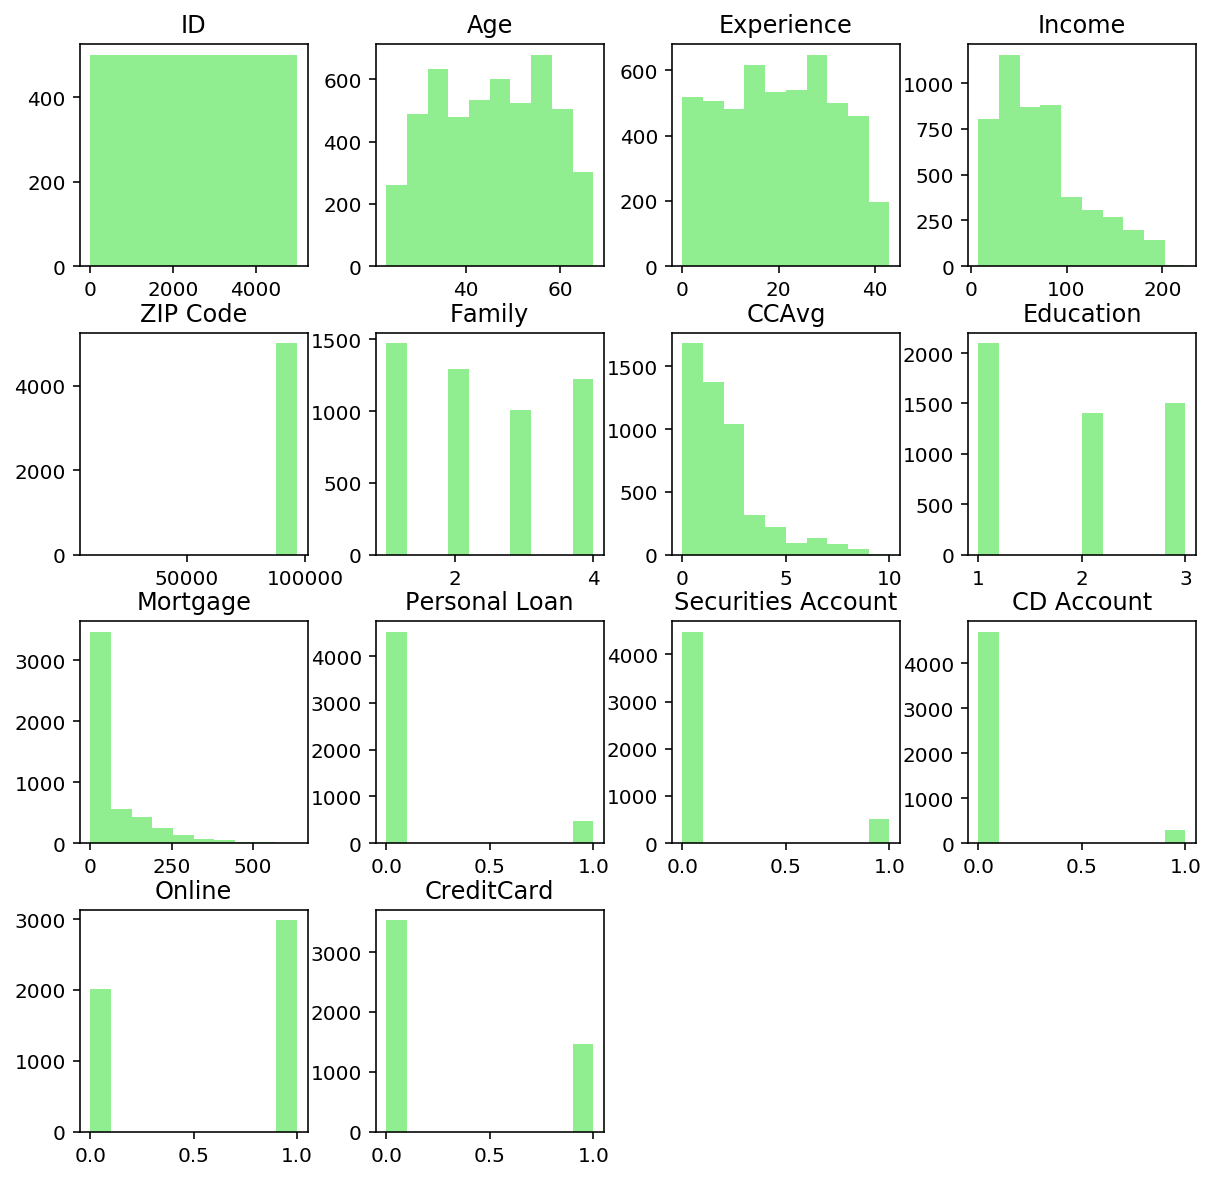

In [9]:
loan_df.hist(figsize=(10,10),color="lightgreen", grid=False)
plt.show()

In [16]:
correlations = loan_df.corr()
correlations

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008265 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994198 -0.055269 -0.029216   
Experience         -0.008265  0.994198    1.000000 -0.046729 -0.028783   
Income             -0.017695 -0.055269   -0.046729  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028783 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052213 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.049912  0.645984 -0.004061   
Education           0.021463  0.041334    0.013536 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010840  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007858  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001111 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010046  0.169738  0.019972   
Online             -0.002528  0.013702    0.013975  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008910 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052213 -0.049912   0.013536 -0.010840      -0.007858   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001111    0.010046  0.013975    0.008910  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [19]:
correlations.abs().idxmax()

ID                                    ID
Age                                  Age
Experience                    Experience
Income                            Income
ZIP Code                        ZIP Code
Family                            Family
CCAvg                              CCAvg
Education                      Education
Mortgage                        Mortgage
Personal Loan              Personal Loan
Securities Account    Securities Account
CD Account                    CD Account
Online                            Online
CreditCard                    CreditCard
dtype: object

In [20]:
log_columns = loan_df.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

CD Account            3.691714
Personal Loan         2.743607
Securities Account    2.588268
Mortgage              2.104002
CCAvg                 1.598443
CreditCard            0.904589
Income                0.841339
dtype: float64

In [21]:
# The log transformations
for col in log_columns.index:
    loan_df[col] = np.log1p(loan_df[col])

In [22]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in loan_df.columns:
    loan_df[col] = mms.fit_transform(loan_df[[col]]).squeeze()

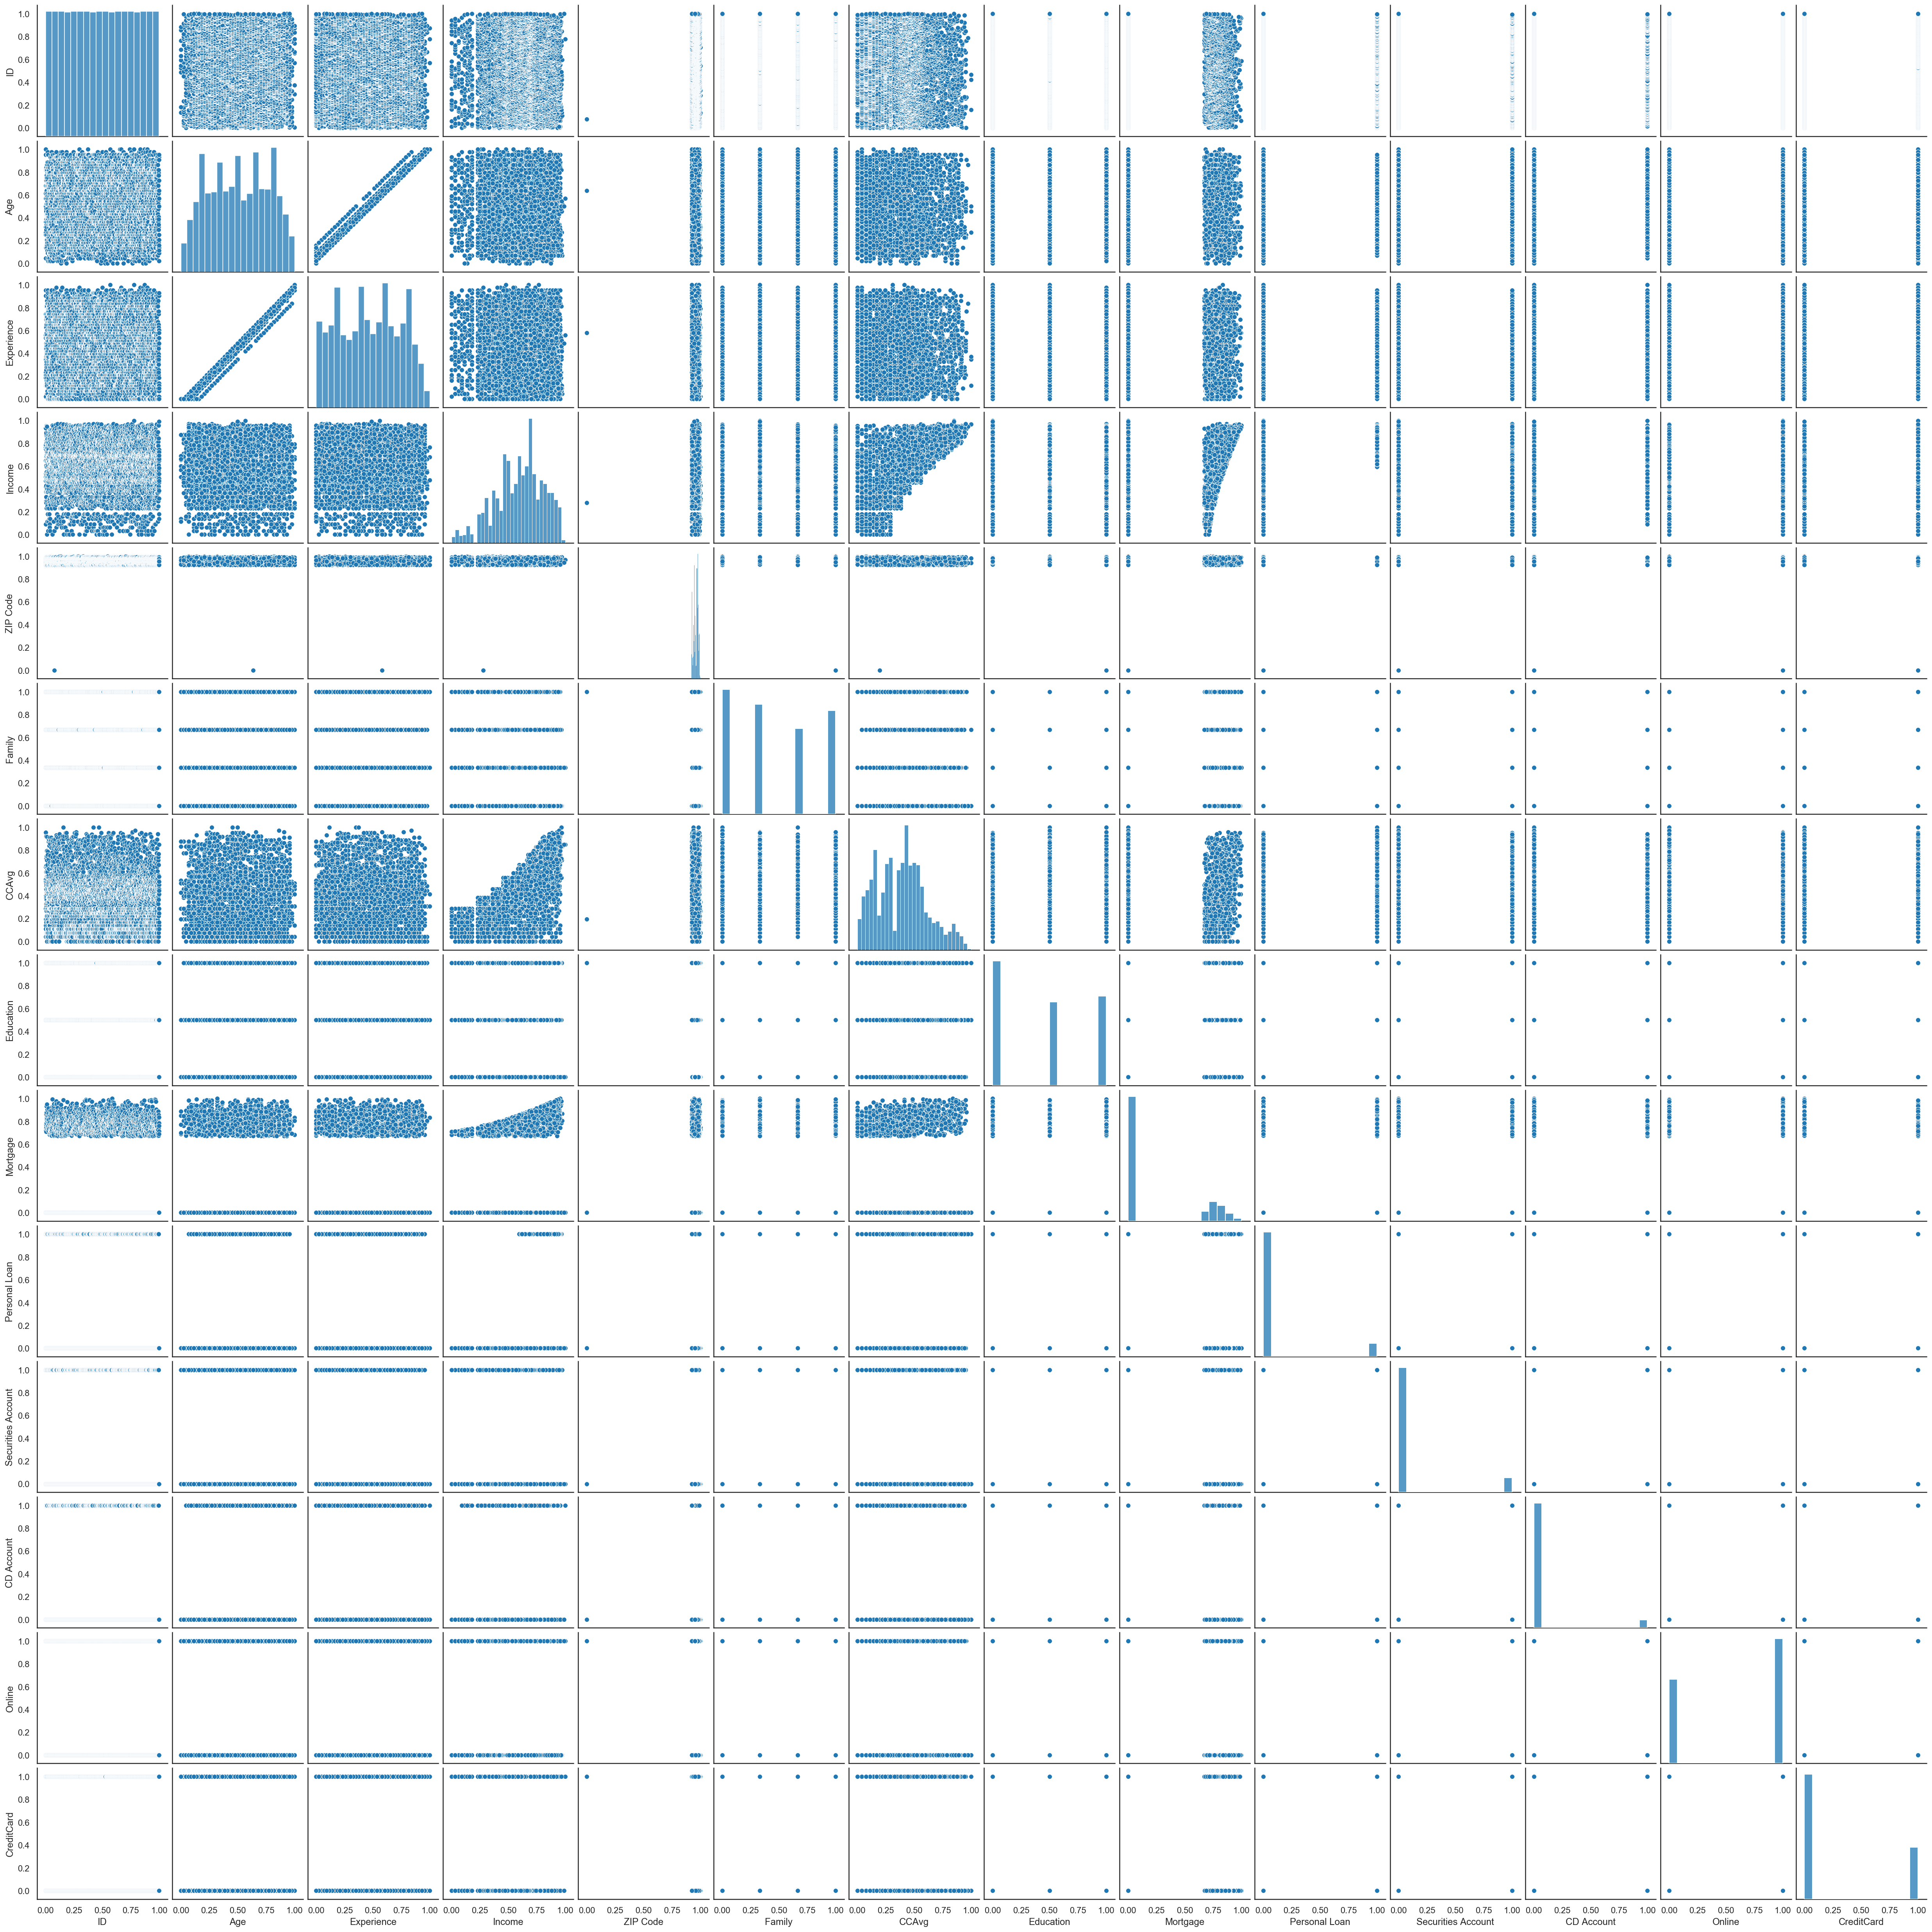

In [23]:
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(loan_df);

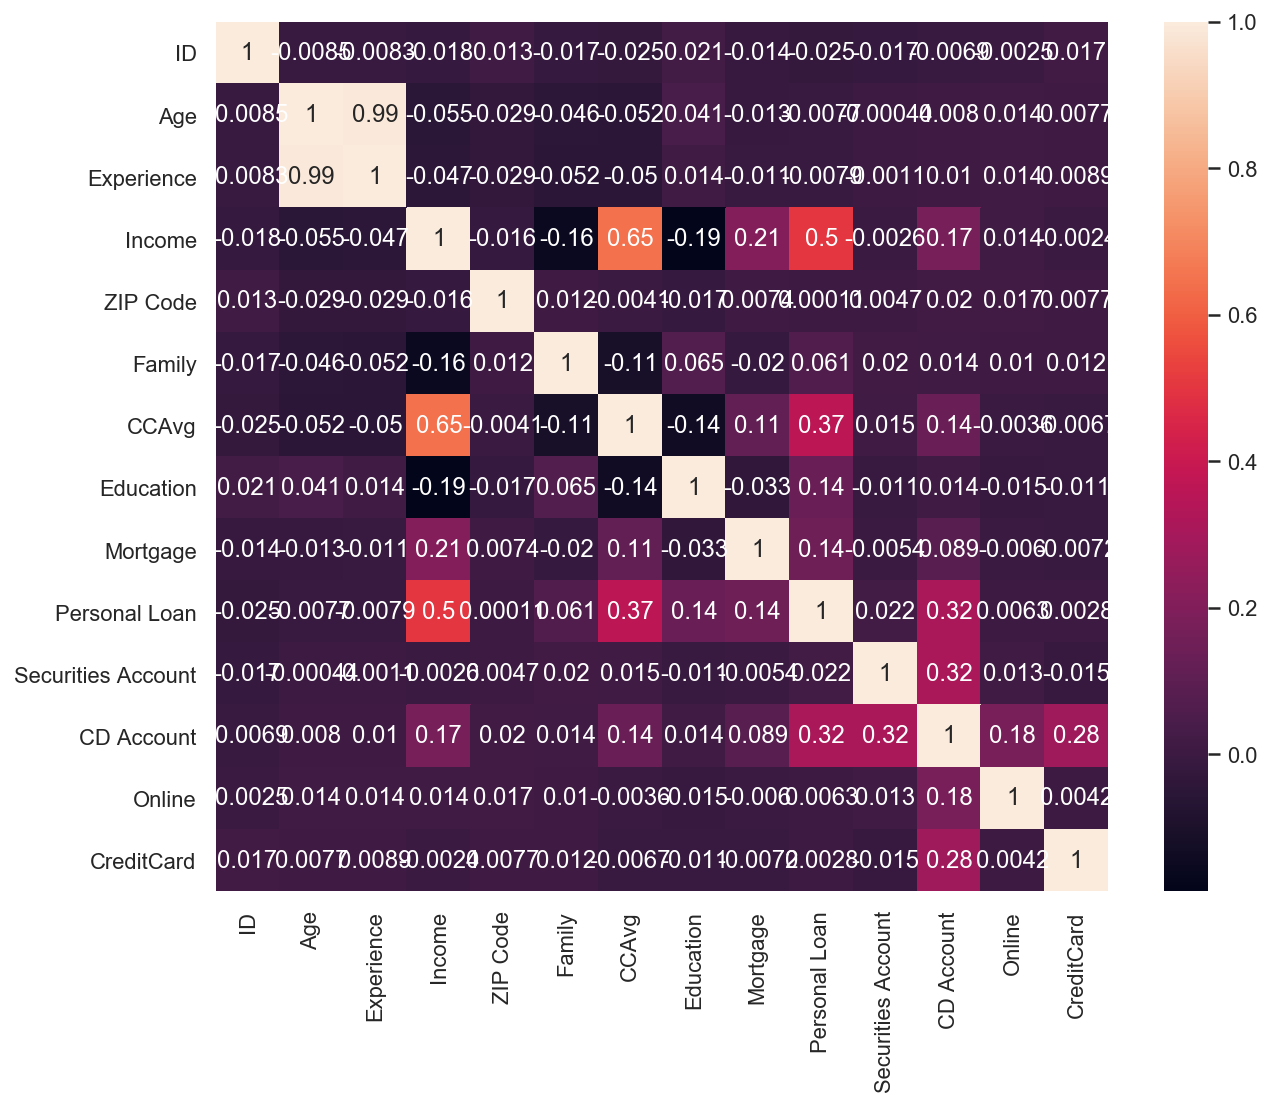

In [24]:
plt.subplots(figsize=(10,8))
sns.heatmap(correlations,annot=True)

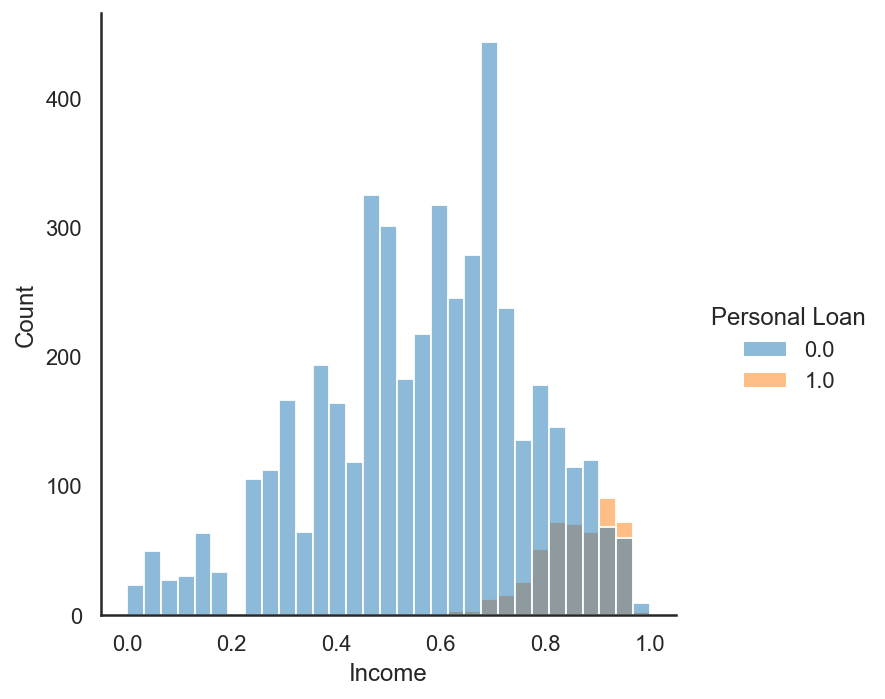

In [25]:
sns.displot(data=loan_df, x="Income", hue="Personal Loan")
plt.show()

In [26]:
y = loan_df["Personal Loan"]
features = ["Income", "CCAvg", "Education", "Mortgage", "CD Account" ]
X = pd.get_dummies(loan_df[features])

In [29]:
# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [30]:
np.mean(y), np.mean(1-y)

(0.096, 0.904)

#### 34.1 K-Means Clustering model

This is the K-Means model

In [38]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(loan_df[features])

loan_df['kmeans'] = km.predict(loan_df[features])

In [42]:
### BEGIN SOLUTION
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(loan_df[features])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

In [49]:
km_list[4]

clusters                                        5
inertia                                728.650241
model       KMeans(n_clusters=5, random_state=42)
dtype: object

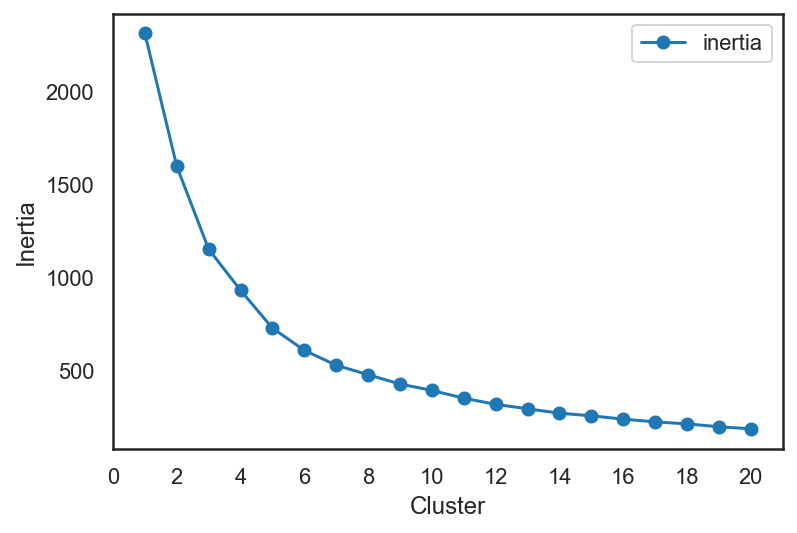

In [40]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

#### 3.2 Aglomerative clustering

This is the aglomerative clustering model:

In [56]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(loan_df[features])
loan_df['agglom'] = ag.fit_predict(loan_df[features])

In [61]:
# First, for Agglomerative Clustering:
print("Agglomerative Clustering\n")
(loan_df[["Personal Loan",'agglom','kmeans']]
         .groupby(["Personal Loan",'agglom'])
         .size()
         .to_frame()
         .rename(columns={0:'number'}))

Agglomerative Clustering



number
Personal Loan agglom        
0.0           0         1715
              1          726
              2         1332
              3          162
              4          585
1.0           0          194
              1           85
              2           34
              3          140
              4           27

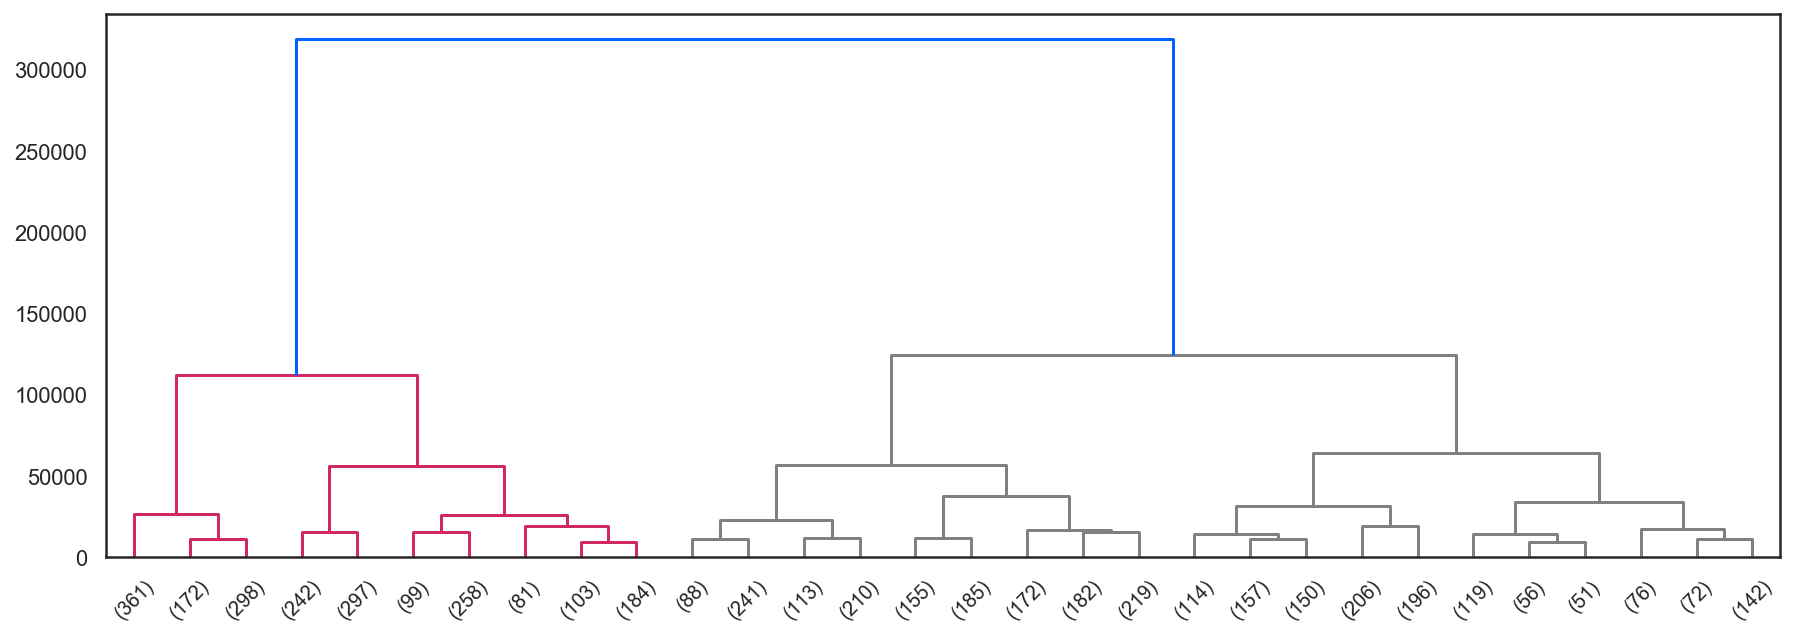

In [62]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red = colors[2]
blue = colors[0]

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)
### END SOLUTION

#### 3.3 Pipeline of models

In this new model we use sklearn's `Pipeline` class and create a pipeline that has the following steps:
<ol>
  <li>A scaler</li>
  <li>PCA(n_components=n)</li>
  <li>LogisticRegression</li>
</ol>

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = loan_df["Personal Loan"]
features = ["Income", "CCAvg", "Education", "Mortgage", "CD Account" ]
X = pd.get_dummies(loan_df[features])
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [1, 2, 5]
score_list = [get_avg_score(n) for n in ns]

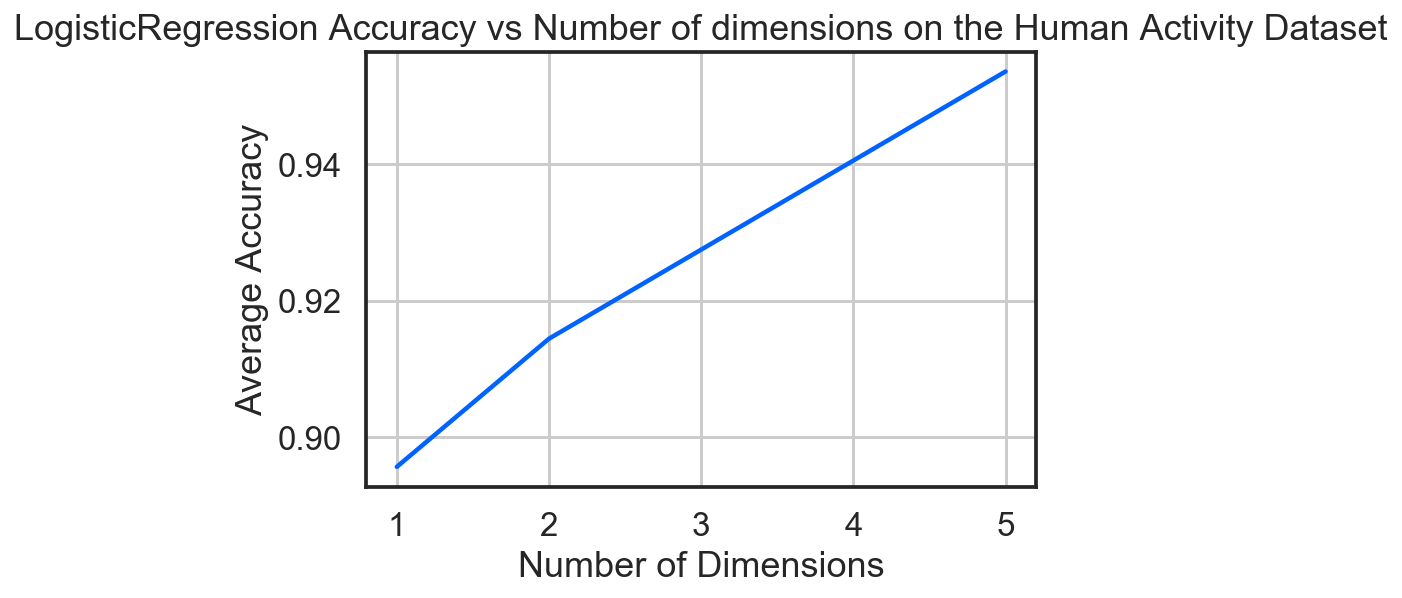

In [67]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

#### 3.4 PCA model

This is the PCA model

In [69]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': loan_df[features].columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                               
1  PCA(n_components=1)  0.388393
2  PCA(n_components=2)  0.680206
3  PCA(n_components=3)  0.845942
4  PCA(n_components=4)  0.959162
5  PCA(n_components=5)       1.0

In [71]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features     CCAvg  CD Account  Education    Income  Mortgage
n                                                            
1         0.082313    0.001836   0.788620  0.102078  0.025153
2         0.050997    0.026383   0.427712  0.065228  0.429680
3         0.183607    0.112098   0.273204  0.176685  0.254404
4         0.188423    0.235953   0.210351  0.173279  0.191994
5         0.241653    0.191546   0.171957  0.240051  0.154792

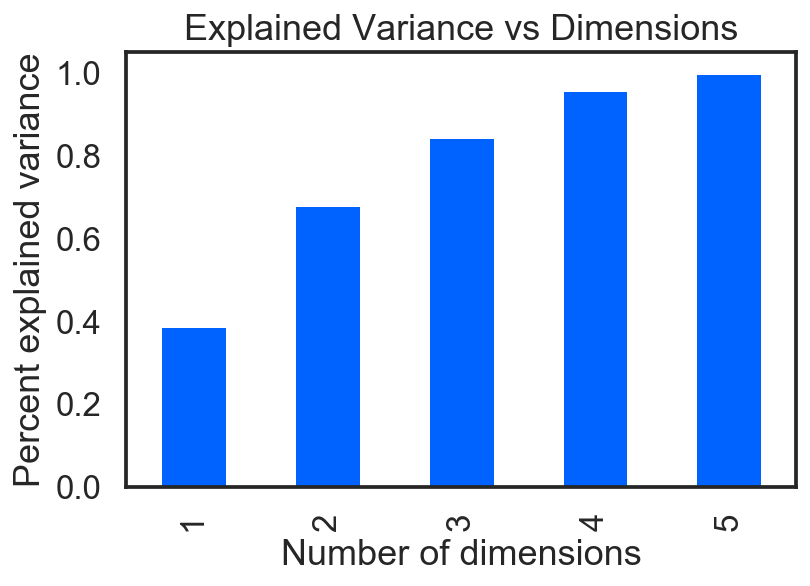

In [72]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

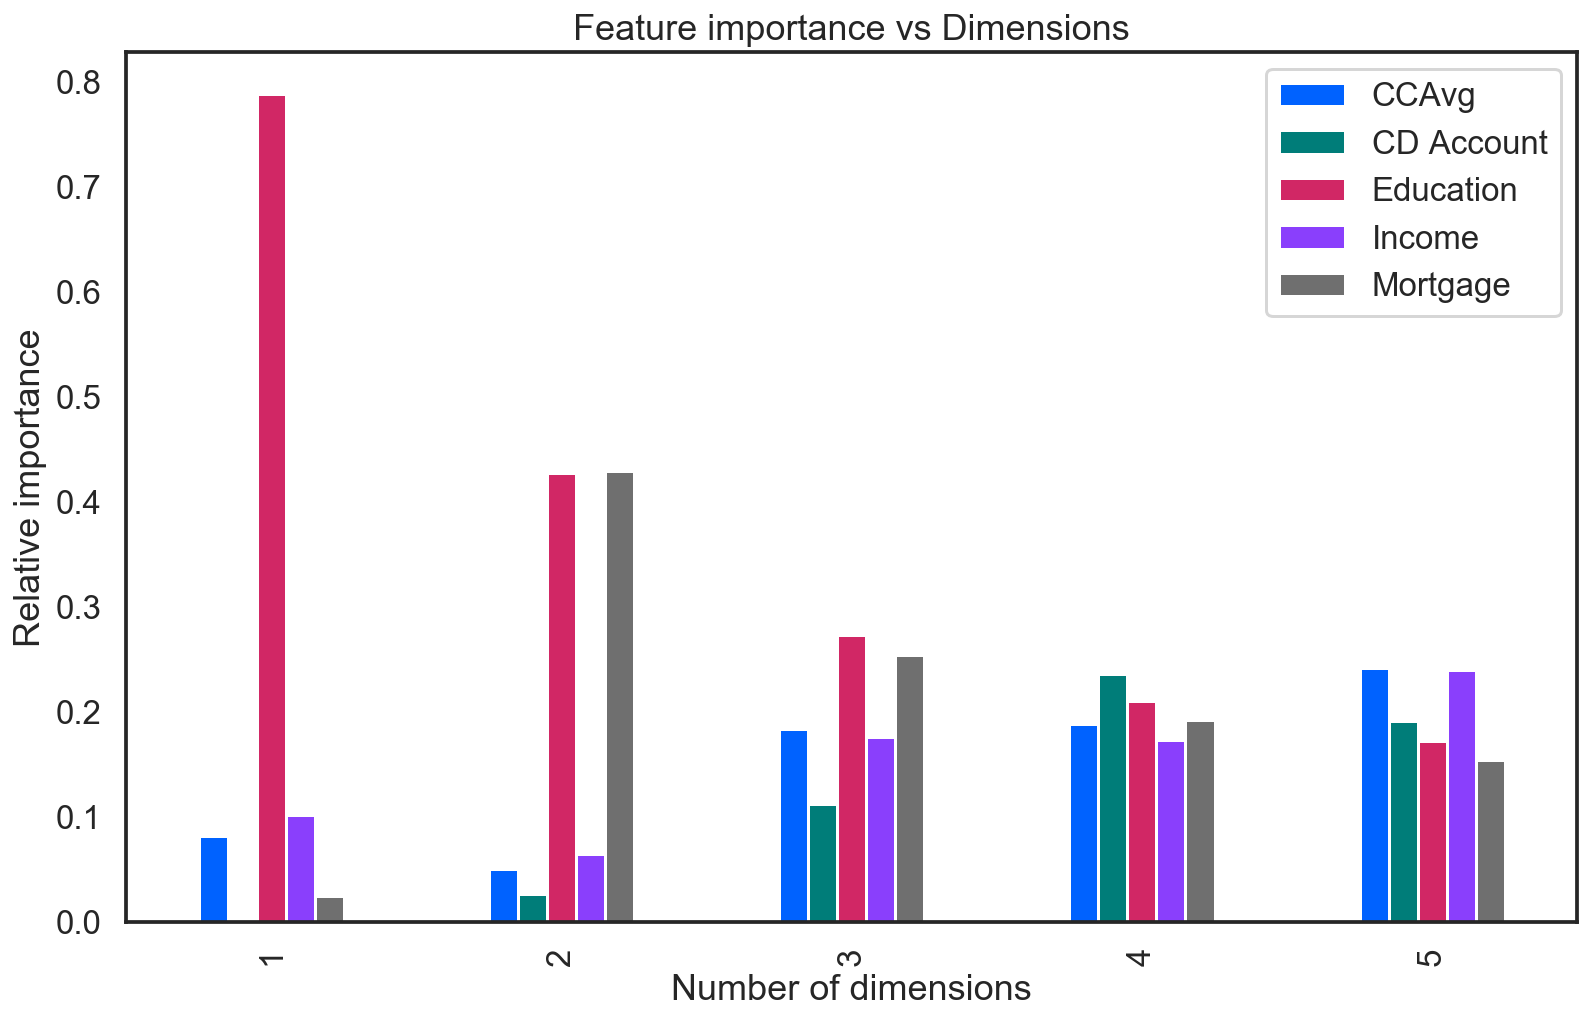

In [73]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

### 5. Insigths

We found that all features contribute for the ML model but the income has the more impact on the Personal Loan outcome. All 5 dimensions are well distributed but when considering bellow 3 dimensions the education ais the feature with more impact on predicting the Persoan Loan.